<a href="https://colab.research.google.com/github/Tharun173/CSE22173-ML-LAB/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/DCT_withoutduplicate 2.csv')
data=pd.DataFrame(df)
print(df)
print(data)

                0           1           2            3           4  \
0     38687.88477  192.737565  188.366005  2348.285240  188.609889   
1     29532.98806  -54.124623  -22.492524  1648.326090   35.160362   
2     29511.41174  -54.495937  -25.026162  1658.645198   34.814464   
3     29060.40637  -19.466804  -11.668273  1487.612245    7.675333   
4     29039.93589  -19.725400   -9.218980  1497.054471    8.947552   
...           ...         ...         ...          ...         ...   
2245  34590.67425  -90.481178  421.895545  2269.474748  107.710202   
2246  34463.79965  -75.135670  422.035399  2045.071565 -139.594897   
2247  33276.41490  346.619982   43.823796  1314.651432   10.557620   
2248  33278.26695  344.970914   44.197445  1312.348411   17.356769   
2249  33006.65196  329.119591   48.862411   975.010421   24.384097   

                5           6           7           8           9  ...  \
0     3359.777672 -454.999177 -201.722600  -42.369585 -277.176688  ...   
1     1980.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data.drop(columns=['LABEL'])
y = data['LABEL']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)




In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = reg.predict(X_test)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")

print("\nTest Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Training Metrics:
MSE: 338.59569484002685, RMSE: 18.400969942914067, MAPE: 0.004078861865981804, R2: 0.6151409261417529

Test Metrics:
MSE: 2010.157684880872, RMSE: 44.83478208802706, MAPE: 0.005274855373537361, R2: -1.3932508992036716


In [9]:
from sklearn.cluster import KMeans

# Perform k-means clustering (k = 2)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Cluster Centers:", centers)


Cluster Labels: [1 1 1 ... 0 0 0]
Cluster Centers: [[ 3.54006554e+04  7.08223441e+01  9.61856039e+01  2.14550905e+03
   8.10019118e+01  2.11085277e+03 -1.50539174e+02 -7.73650738e+01
  -4.39869141e+01 -1.95687560e+02 -5.82155773e+02 -1.60219679e+02
  -2.14397174e+03 -1.59722915e+02 -5.13416645e+02  1.06947553e+02
  -2.62729042e+01  8.08580479e+01  1.44864541e+02 -5.29733929e+01
   1.37809144e+02 -3.10241798e+02  9.39599125e+01  4.39523557e+02
   2.99574653e+02  3.77642903e+02  8.70858682e+01 -3.51334652e+02
  -1.39440394e+01  6.59872697e+01 -3.17672059e+01  8.08529954e+01
   1.38649617e+02 -8.22915393e+01  7.98919360e+01 -3.64447475e+01
   1.93192558e+02  9.31627155e-01  3.66294048e+02 -1.51829561e+02
   1.20302933e+02 -1.43142851e+02  4.08056868e+02  1.59438185e+01
   1.76453705e+02 -2.50337451e+01 -3.62207033e+01 -2.71356170e+01
  -1.58816016e+02 -1.57266913e+02 -1.05352326e+02 -1.92426357e+02
   7.97209722e+00 -4.34430825e+01 -1.19154532e+01  4.80719842e+01
  -1.87371990e+01 -2.0669

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate the scores
silhouette = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")


Silhouette Score: 0.3050366721875641
Calinski-Harabasz Score: 954.5446017152757
Davies-Bouldin Index: 1.2194042240415222


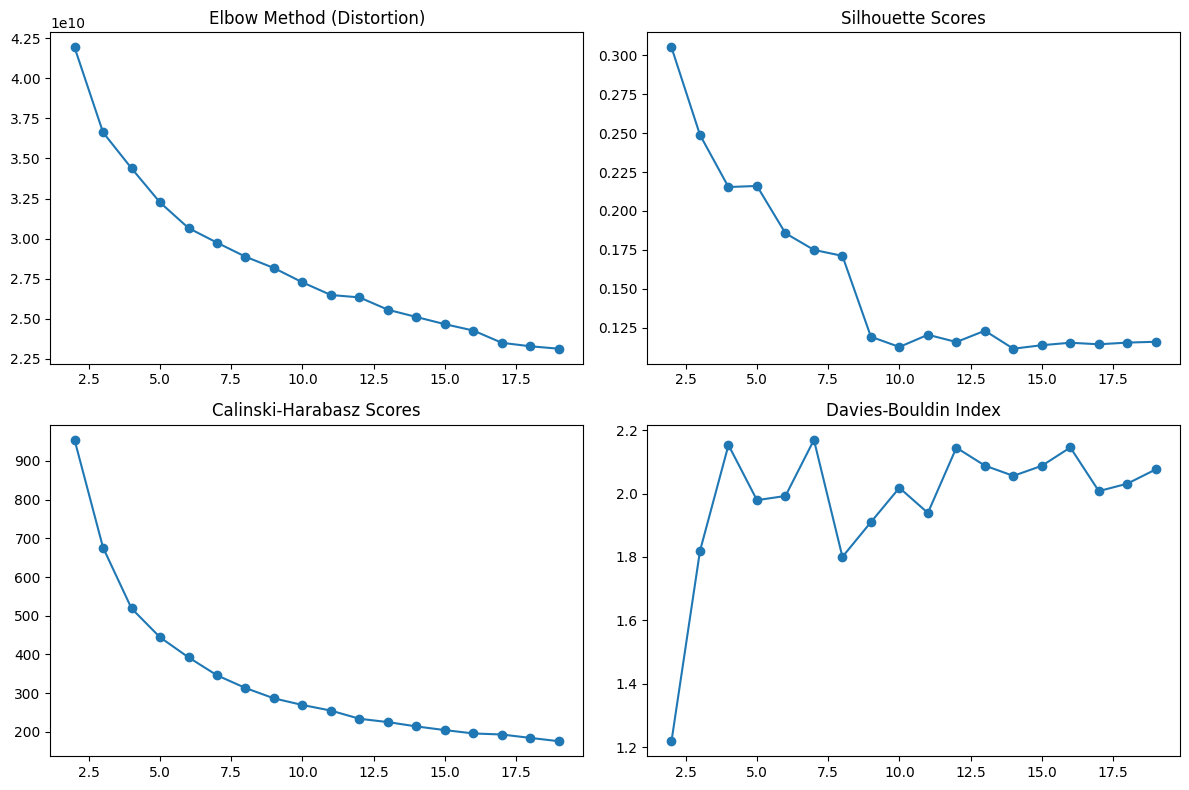

In [11]:
import matplotlib.pyplot as plt

distortions = []
silhouettes = []
chs = []
dbs = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train, kmeans.labels_))
    chs.append(calinski_harabasz_score(X_train, kmeans.labels_))
    dbs.append(davies_bouldin_score(X_train, kmeans.labels_))

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method (Distortion)')

plt.subplot(2, 2, 2)
plt.plot(range(2, 20), silhouettes, marker='o')
plt.title('Silhouette Scores')

plt.subplot(2, 2, 3)
plt.plot(range(2, 20), chs, marker='o')
plt.title('Calinski-Harabasz Scores')

plt.subplot(2, 2, 4)
plt.plot(range(2, 20), dbs, marker='o')
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


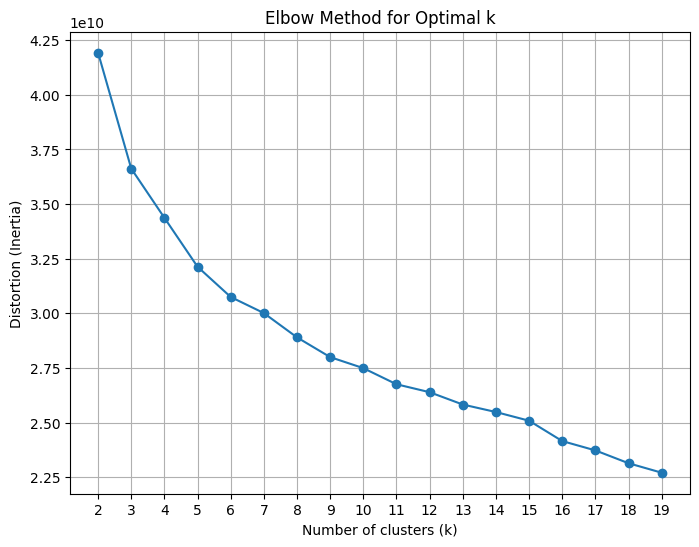

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store the distortions (sum of squared distances to the closest cluster center)
distortions = []

# Calculate distortions for a range of k values
for k in range(2, 20):  # k values from 2 to 19
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances to the nearest cluster center

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()
